In [1]:
from tqst_class import *

In [4]:
tomo = tQST(4)
nq = tomo.get_num_of_qubits()
print(nq)
N=nq**2

diagonal_ideal = np.zeros(N)
diagonal_ideal[0]=1/4
diagonal_ideal[3]=1/4
diagonal_ideal[12]=1/4
diagonal_ideal[15]=1/4
print(diagonal_ideal)
# diagonal=diagonal/np.sum(diagonal)
tomo.set_diagonal_counts(diagonal_ideal)
tdict = tomo.get_diagonal_counts()

gini = dmt.gini_index(diagonal_ideal)
threshold = tomo.set_threshold(gini)


offd_projs = tomo.get_projs_to_measure()
print("nb of measurement necessary: ", np.shape(offd_projs))

Number of qubits set to 4.
4
[0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.
 0.   0.25]
Diagonal counts are now set.
The threshold is now set to 0.05.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |   |HHDD>  |
|  (0, 3, 'i')   |   |HHDR>  |
|  (0, 12, 'r')  |   |DDHH>  |
|  (0, 12, 'i')  |   |DRHH>  |
|  (0, 15, 'r')  |   |DDDD>  |
|  (0, 15, 'i')  |   |DDDR>  |
|  (3, 12, 'r')  |   |DRDR>  |
|  (3, 12, 'i')  |   |DRDD>  |
|  (3, 15, 'r')  |   |DDVV>  |
|  (3, 15, 'i')  |   |DRVV>  |
| (12, 15, 'r')  |   |VVDD>  |
| (12, 15, 'i')  |   |VVDR>  |
+----------------+-----------+
nb of measurement necessary:  (12,)


### Get diagonal counts

<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_20980\71932830.py:6: SyntaxWarning: invalid escape sequence '\T'
  filename_diag='\Tomo_20Gen_Diag_Diego'


Loading...  \Tomo_20Gen_Diag_Diego
Sorted Binary Strings: ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
Original Indexes: [12, 4, 0, 8, 13, 5, 1, 9, 14, 6, 2, 10, 15, 7, 3, 11]
original coinc: [' 0.0' ' 7.0' ' 0.0' ' 5.0' ' 3.0' ' 1.0' ' 0.0' ' 0.0' ' 132.0' ' 2.0'
 ' 0.0' ' 125.0' ' 187.0' ' 0.0' ' 4.0' ' 169.0']
diag_coinc, ordered: [' 187.0' ' 3.0' ' 0.0' ' 132.0' ' 0.0' ' 1.0' ' 7.0' ' 2.0' ' 4.0' ' 0.0'
 ' 0.0' ' 0.0' ' 169.0' ' 0.0' ' 5.0' ' 125.0']
Type time-bin, ordered: [' 00' ' 00' ' 00' ' 00' ' 01' ' 01' ' 01' ' 01' ' 10' ' 10' ' 10' ' 10'
 ' 11' ' 11' ' 11' ' 11']
Type freq-bin, ordered: [' 00' ' 01' ' 10' ' 11' ' 00' ' 01' ' 10' ' 11' ' 00' ' 01' ' 10' ' 11'
 ' 00' ' 01' ' 10' ' 11']
Normalized coinc diag:  [0.29448819 0.00472441 0.         0.20787402 0.         0.0015748
 0.01102362 0.00314961 0.00629921 0.         0.         0.
 0.26614173 0.         0.00787402 0.19685039]


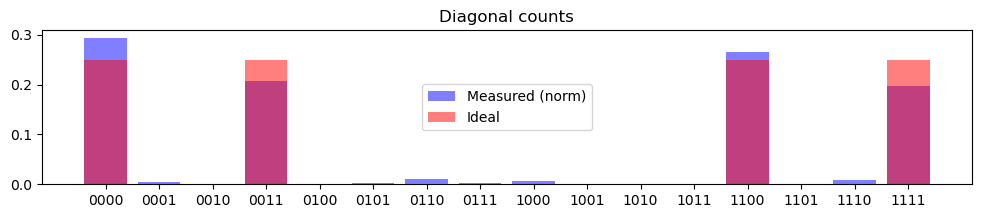

In [31]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
# DIR=r'C:\\Users\\S46 b\\Documents\\Sara'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename_diag='\Tomo_20Gen_Diag_Diego'
fpath=DIR+folder+filename_diag


print("Loading... ", filename_diag)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)

binary_strings=data[:,0]
coinc=data[:,1]
diag_type_TB=data[:,6]
diag_type_FB=data[:,9]

## Order the binary data
indexed_binary_strings = enumerate(binary_strings)
sorted_with_indexes = sorted(indexed_binary_strings, key=lambda x: int(x[1], 2))

# Extract sorted strings and their original indexes
sorted_strings = [x[1] for x in sorted_with_indexes]
sorted_indexes = [x[0] for x in sorted_with_indexes]

diag_coinc=coinc[sorted_indexes]
diag_type_TB=diag_type_TB[sorted_indexes]
diag_type_FB=diag_type_FB[sorted_indexes]

print("Sorted Binary Strings:", sorted_strings)
print("Original Indexes:", sorted_indexes)
print("original coinc:", coinc)
print("diag_coinc, ordered:", diag_coinc)
print("Type time-bin, ordered:", diag_type_TB)
print("Type freq-bin, ordered:", diag_type_FB)

# Convert each string to a float
diag_coinc_arr = [float(x) for x in diag_coinc]
# tomo.set_diagonal_counts(diag_coinc_arr)

fig, ax= plt.subplots(figsize=(12, 2), ncols=1, nrows=1)
ax.bar(sorted_strings,diag_coinc_arr/np.sum(diag_coinc_arr), label='Measured (norm)', color='blue', alpha=0.5)
ax.bar(sorted_strings,diagonal_ideal, label='Ideal', color='red', alpha=0.5)
ax.set_title("Diagonal counts")
ax.legend(loc='center')

print("Normalized coinc diag: ", diag_coinc_arr/np.sum(diag_coinc_arr))

In [5]:
## if you want to calculate again the projector with the measured diagonal elements

gini = dmt.gini_index(diag_coinc_arr)
threshold = tomo.set_threshold(gini)

offd_projs = tomo.get_projs_to_measure()
print(np.shape(offd_projs))


tomo.set_diagonal_counts(diag_coinc_arr)
# gini = 0.04
gini = dmt.gini_index(diag_coinc_arr)
threshold = tomo.set_threshold(gini)

offd_projs = tomo.get_projs_to_measure()
print(np.shape(offd_projs))

The threshold is now set to 0.05028215223097113.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |   |HHDD>  |
|  (0, 3, 'i')   |   |HHDR>  |
|  (0, 12, 'r')  |   |DDHH>  |
|  (0, 12, 'i')  |   |DRHH>  |
|  (0, 15, 'r')  |   |DDDD>  |
|  (0, 15, 'i')  |   |DDDR>  |
|  (3, 12, 'r')  |   |DRDR>  |
|  (3, 12, 'i')  |   |DRDD>  |
|  (3, 15, 'r')  |   |DDVV>  |
|  (3, 15, 'i')  |   |DRVV>  |
| (12, 15, 'r')  |   |VVDD>  |
| (12, 15, 'i')  |   |VVDR>  |
+----------------+-----------+
(12,)
Diagonal counts are now set.
The threshold is now set to 0.05028215223097113.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |   |HHDD>  |
|  (0, 3, 'i')   |   |HHDR>  |
|  (0, 6, 'r')   |   |HDDH>  |
|  (0, 

### Get counts for the measured projectors

In [110]:
import pandas as pd

# DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
# folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename='\Tomo_20Gen_all_Diego_short'
fpath=DIR+folder+filename

### Proj_ideal, Coinc, ph_s0, ph_i0, ph_s1, ph_i1, type_tb, ph_RF_s, ph_RF_i, type_fb
print("Loading... ", filename)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)
settings_TB=np.zeros([4,len(data)])
settings_FB=np.zeros([2,len(data)])

proj_name=data[:,0]
print(proj_name)
coinc=data[:,1]
settings_TB[0,:]=data[:,2]
settings_TB[1,]=data[:,3]
settings_TB[2,:]=data[:,4]
settings_TB[3,:]=data[:,5]
type_TB=data[:,6]
settings_FB[0,:]=data[:,7]
settings_FB[1,:]=data[:,8]
settings_FB=settings_FB
type_FB=data[:,9]
# Convert each string to a float
coinc_arr = np.asarray([float(x) for x in coinc])
print(coinc_arr)

Loading...  \Tomo_20Gen_all_Diego_short
['HHDD' 'HHDR' 'DDHH' 'DLHH' 'DDDD' 'DDDR' 'DLDR' 'DLDD' 'VVDD' 'VVDR']
[ 49.  38. 609. 386. 161. 110.  69. 100.  59.  24.]


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_20980\1143139711.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename='\Tomo_20Gen_all_Diego_short'


## Rho with measured counts & ideal projectors
### First method (need normalization)

Diagonal counts are now set.
(26, 16)
The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


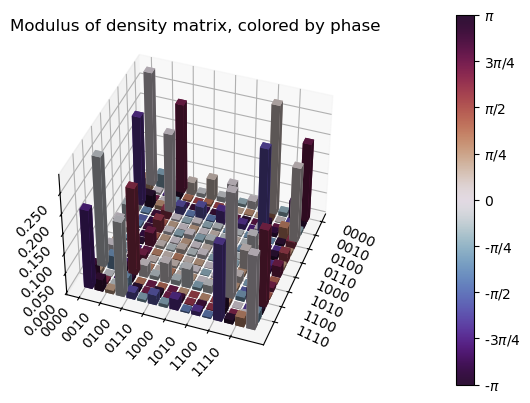

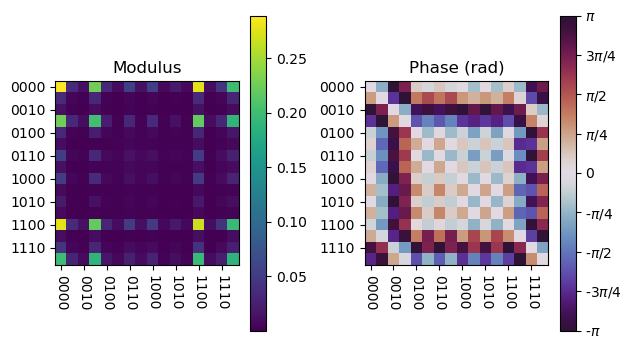

In [92]:
# coinc_arr.transpose()
# proj_name.transpose()
tomo.set_diagonal_counts(diag_coinc_arr/np.sum(diag_coinc_arr))
tomo.set_projs_and_counts(proj_name, coinc_arr/np.sum(coinc_arr))
projs, counts = tomo.get_projs_and_counts()
print(np.shape(projs))
# print(np.shape(counts))
# print(counts)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)

dmt.plot_density_matrix_3D(rho_rec)
dmt.plot_density_matrix_2D(rho_rec)

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


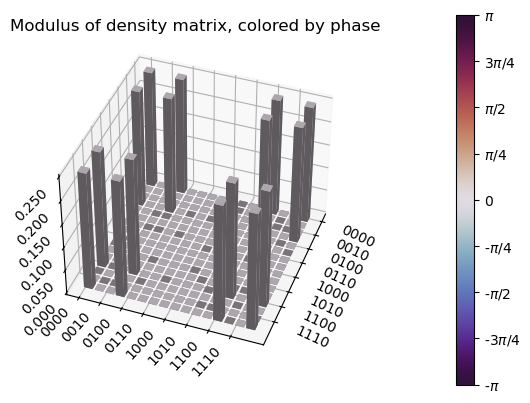

0.46404254049024757
0.8757665071690519


In [94]:
## Ideal density matrix

psi_true=np.zeros(N)
psi_true[0]=1/2
psi_true[3]=1/2
psi_true[12]=1/2
psi_true[15]=1/2
rho_true=np.outer(psi_true,psi_true)

dmt.plot_density_matrix_3D(rho_true)

f=dmt.fidelity(rho_rec,rho_true)
print(f)
pur=dmt.purity(rho_rec)
print(pur)

(28,)
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j
 0.

c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


<BarContainer object of 12 artists>

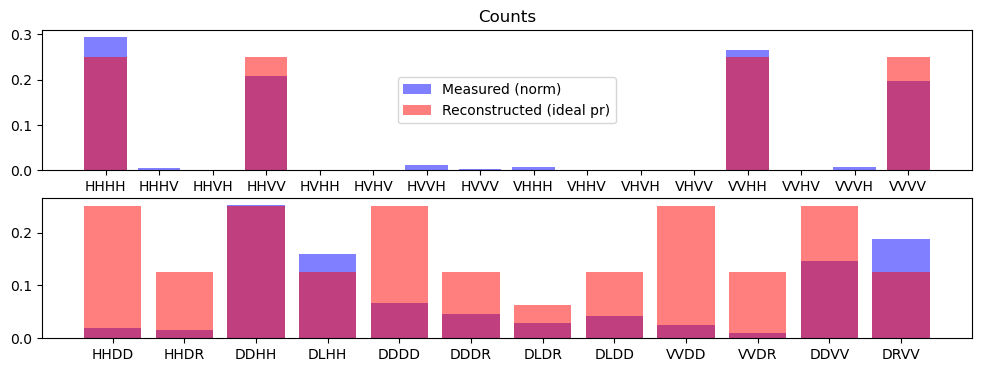

In [79]:
diag_name=np.array(['HHHH','HHHV','HHVH','HHVV','HVHH','HVHV','HVVH','HVVV','VHHH','VHHV','VHVH','VHVV','VVHH','VVHV','VVVH','VVVV'])

counts_ideal=np.zeros(N+len(proj_name), dtype=complex)
print(np.shape(counts_ideal))
fig, ax= plt.subplots(figsize=(12, 4), ncols=1, nrows=2)
for d in range(len(diag_name)):
    # print(diag_name[d])
    Pr_ideal=prj.extended_projector_from_string(diag_name[d])
    print(Pr_ideal)
    counts_ideal1=np.matmul(rho_true,Pr_ideal.conj().T)
    counts_ideal[d]=np.matmul(Pr_ideal,counts_ideal1)
    # print(counts_ideal[d], diag_coinc_arr[d]/np.sum(diag_coinc_arr))

ax[0].bar(diag_name,diag_coinc_arr/np.sum(diag_coinc_arr), label='Measured (norm)', color='blue', alpha=0.5)
ax[0].bar(diag_name,counts_ideal[:N], label='Reconstructed (ideal pr)', color='red', alpha=0.5)
ax[0].set_title("Counts")
ax[0].legend(loc='center')

for d in range(len(proj_name)):
    print(proj_name[d])
    Pr_ideal=prj.extended_projector_from_string(proj_name[d])
    print(Pr_ideal)
    counts_ideal1=np.matmul(rho_true,Pr_ideal.conj().T)
    counts_ideal[d+N]=np.matmul(Pr_ideal,counts_ideal1)
    # print(counts_ideal[d+N], coinc_arr[d]/np.sum(coinc_arr))
    print(counts_ideal[d+N])

ax[1].bar(proj_name,coinc_arr/np.sum(coinc_arr), label='Measured (norm)', color='blue', alpha=0.5)
ax[1].bar(proj_name,counts_ideal[N:], label='Reconstructed (ideal pr)', color='red', alpha=0.5)
# ax[1].set_title("Projectors' counts")
# ax[1].legend()

    

In [77]:
print(prj.extended_projector_from_string(diag_name[d]))
print(counts_ideal)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.25  +0.j 0.    +0.j 0.    +0.j 0.25  +0.j 0.    +0.j 0.    +0.j
 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j
 0.25  +0.j 0.    +0.j 0.    +0.j 0.25  +0.j 0.    +0.j 0.125 +0.j
 0.25  +0.j 0.125 +0.j 0.    +0.j 0.125 +0.j 0.0625+0.j 0.    +0.j
 0.    +0.j 0.125 +0.j 0.25  +0.j 0.125 +0.j]


## Definition of the set-up matrixes

3. Now let's set our real projectors...

TO be considered:
- losses -> coefficients in the matrixes to be specified from calibration measurement
- post selection factors -> already taken into account by the tb and fb matrixes


In [88]:
def W_tb_si_func(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l):
    W=np.zeros([4,4], dtype=np.complex128)
    W[0,0]=Css*np.exp((phs_s+phi_s)*1.0j)
    W[1,0]=Csl*np.exp((phs_s+phi_l)*1.0j)
    W[2,0]=Cls*np.exp((phs_l+phi_s)*1.0j)
    W[3,0]=Cll*np.exp((phs_l+phi_l)*1.0j)
    W[1,1]= W[0,0]
    W[2,2]= W[0,0]
    W[3,3]= W[0,0]
    W[3,1]= W[2,0]
    W[3,2]= W[1,0]
    
    return W

def W_fb_func(J_1, J0, J1, theta):
    W=np.zeros([2,2], dtype=np.complex128)
    W[0,0] = J0
    W[1,1] = W[0,0]
    W[0,1] = J1*np.exp(theta*1.0j)
    W[1,0] = -J_1*np.exp(-theta*1.0j)

    return W

def W_fb_si_func(J_1_s, J0_s, J1_s, ph_s, J_1_i, J0_i, J1_i, ph_i):
    W_s=W_fb_func(J_1_s, J0_s, J1_s, ph_s)
    W_i=W_fb_func(J_1_i, J0_i, J1_i, ph_i)
    W=np.kron(W_s,W_i) 

    return W


In [ ]:
## try if the matrixes work

# W_tb_si(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l)
W_tb_si=W_tb_si_func(1.42732558, 1.20348837, 1.2005814, 1.0, 0, 0, 0.0, np.pi/2)
print(W_tb_si)

# W_fb_si(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
W_fb_si=W_fb_si_func(1,1,1,0,1,1,1,0)
print(W_fb_si)

Wexp=np.kron(W_tb_si,W_fb_si)
print(Wexp)

[[1.42732558e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [7.36924090e-17+1.20348837j 1.42732558e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [1.20058140e+00+0.j         0.00000000e+00+0.j
  1.42732558e+00+0.j         0.00000000e+00+0.j        ]
 [6.12323400e-17+1.j         1.20058140e+00+0.j
  7.36924090e-17+1.20348837j 1.42732558e+00+0.j        ]]
[[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]]
[[1.42732558e+00+0.j         1.42732558e+00+0.j
  1.42732558e+00+0.j         1.42732558e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [1.42732558e+00+0.j         1.42732558e+00+0.j
  1.42732558e

## Real projectors definition 

Projector_real = matrix_real * base_vect

Ideal proj diag:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [0.1241512+0.j 0.       +0.j 0.       +0.j 0.       +0.j 0.       +0.j
 0.       +0.j 0.       +0.j 0.       +0.j 0.       +0.j 0.       +0.j
 0.       +0.j 0.       +0.j 0.       +0.j 0.       +0.j 0.       +0.j
 0.       +0.j]
Ideal proj diag:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [0.       +0.j 0.1241512+0.j 0.       +0.j 0.       +0.j 0.       +0.j
 0.       +0.j 0.       +0.j 0.       +0.j 0.       +0.j 0.       +0.j
 0.       +0.j 0.       +0.j 0.       +0.j 0.       +0.j 0.       +0.j
 0.       +0.j]
Ideal proj diag:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [0.       +0.j 0.       +0.j 0.1241512+0.j 0.       +0.j 0.       +0.j
 0.       +0.j 0.       

C:\Users\sc266065\AppData\Local\Temp\ipykernel_20980\2706642197.py:153: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (axr,axi)= plt.subplots(figsize=(12, 4), ncols=1, nrows=2, sharex=True)


0.20382477422827558 0.20382477422827558 0.20382477422827558 0.0 0.20382477422827558 0.20382477422827558 0.20382477422827558 0.0
Base:  VVHH
Proj:  DLDD
Ideal proj:  [0.25+0.j   0.25+0.j   0.25+0.j   0.25+0.j   0.  -0.25j 0.  -0.25j
 0.  -0.25j 0.  -0.25j 0.25+0.j   0.25+0.j   0.25+0.j   0.25+0.j
 0.  -0.25j 0.  -0.25j 0.  -0.25j 0.  -0.25j]
Exp proj:  [-1.52601611e-07+0.04154454j -1.52601611e-07+0.04154454j
 -1.52601611e-07+0.04154454j -1.52601611e-07+0.04154454j
  4.08539996e-02+0.j          4.08539996e-02+0.j
  4.08539996e-02+0.j          4.08539996e-02+0.j
 -1.78493785e-07+0.04859347j -1.78493785e-07+0.04859347j
 -1.78493785e-07+0.04859347j -1.78493785e-07+0.04859347j
  4.09698976e-02+0.j          4.09698976e-02+0.j
  4.09698976e-02+0.j          4.09698976e-02+0.j        ]
0.20382477422827558 0.20382477422827558 0.20382477422827558 0.0 0.20382477422827558 0.20382477422827558 0.20382477422827558 0.0
2l2l case
Base:  VVHH
Proj:  VVDD
Ideal proj:  [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0

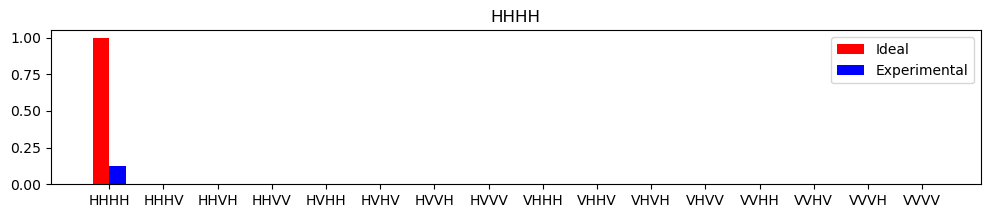

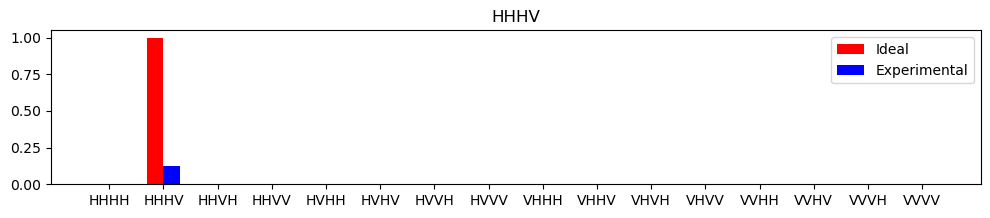

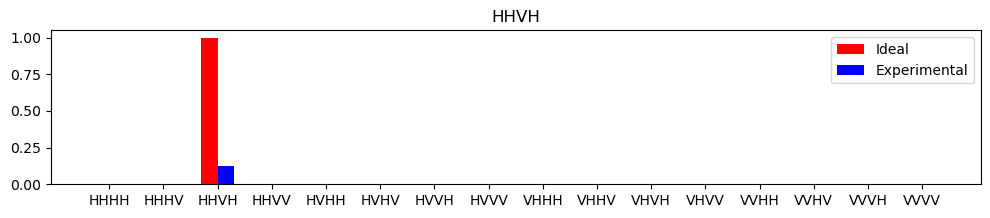

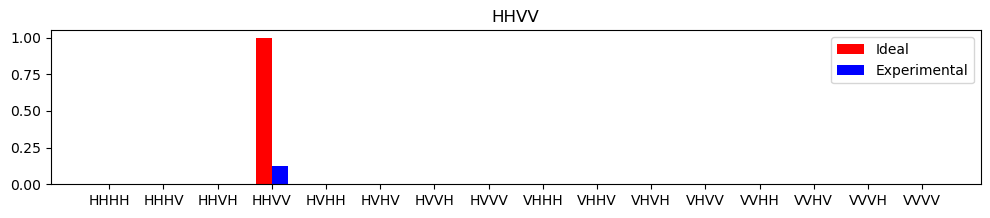

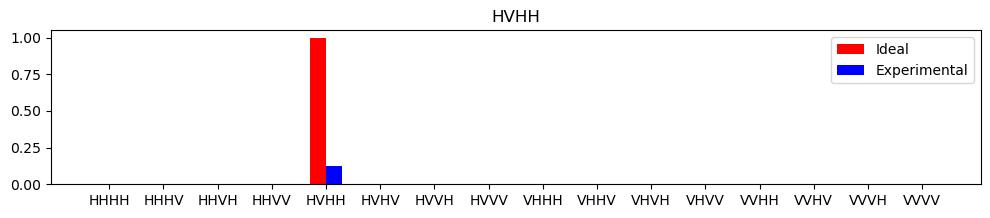

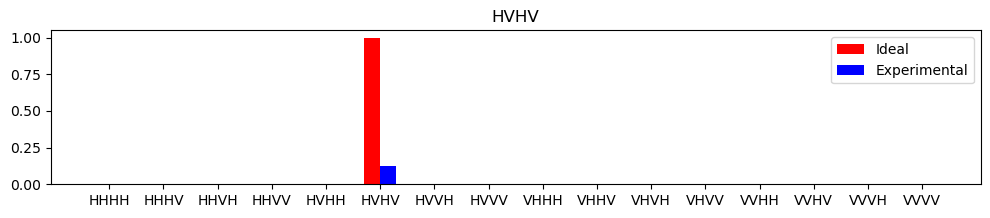

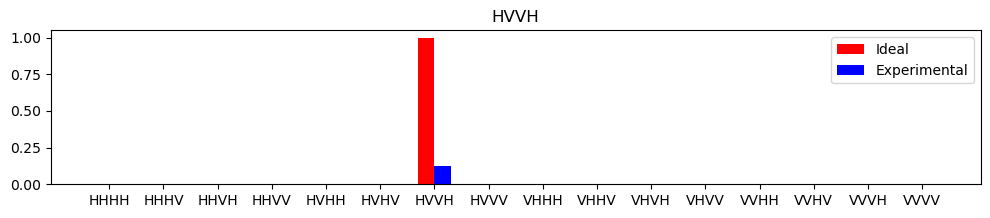

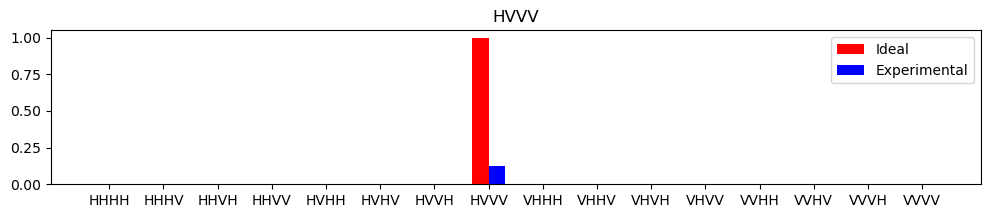

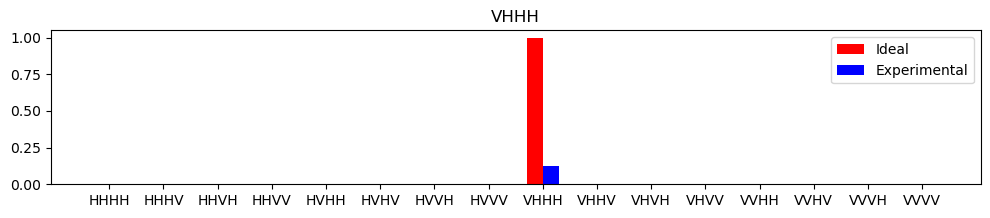

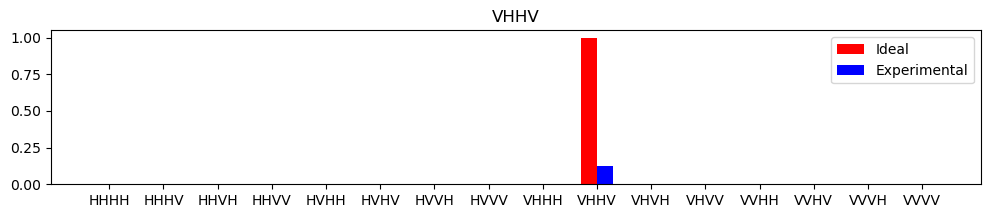

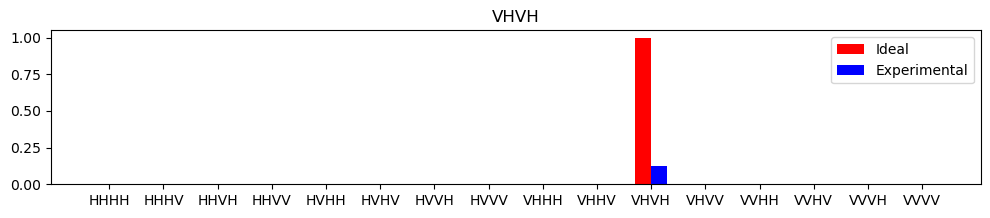

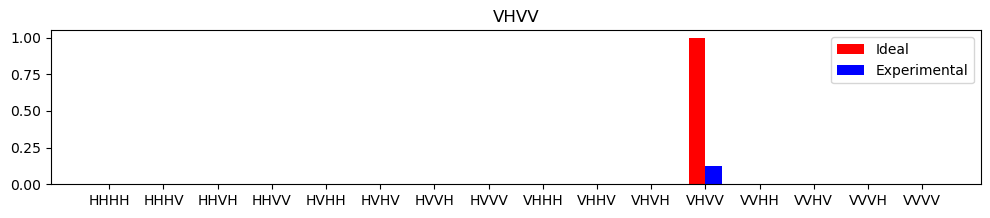

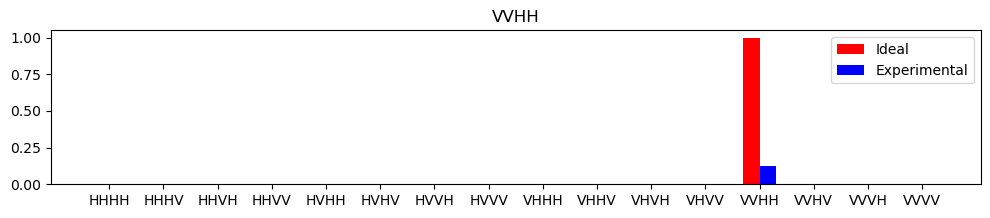

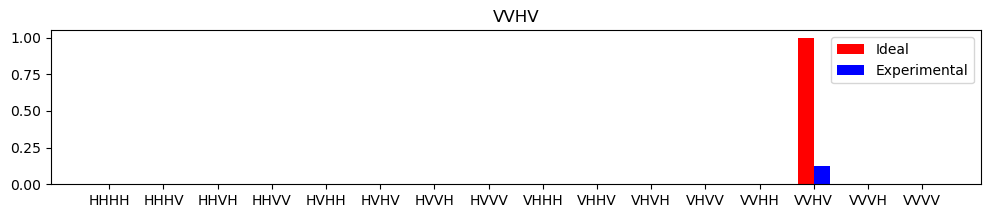

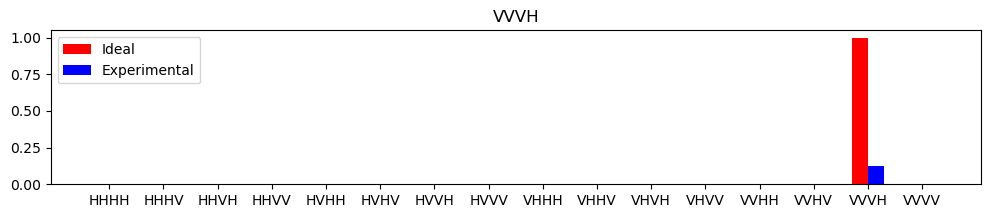

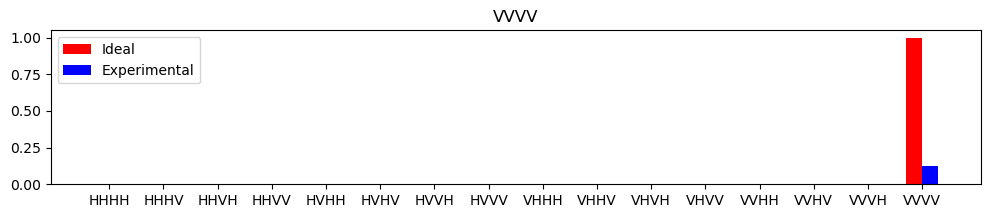

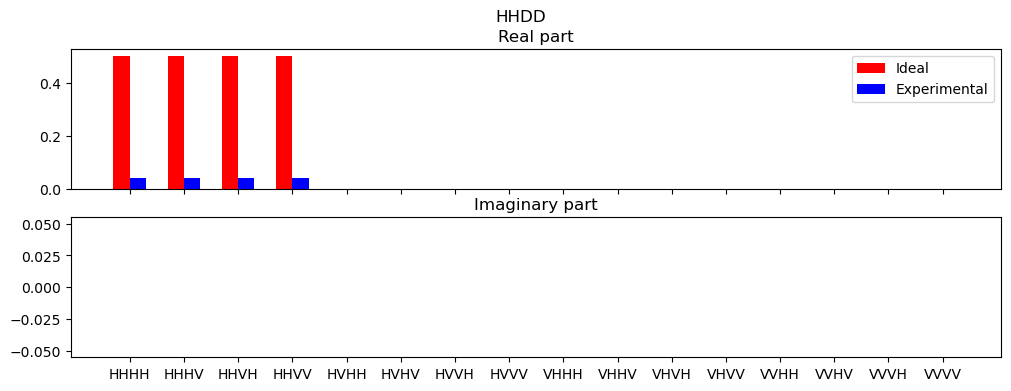

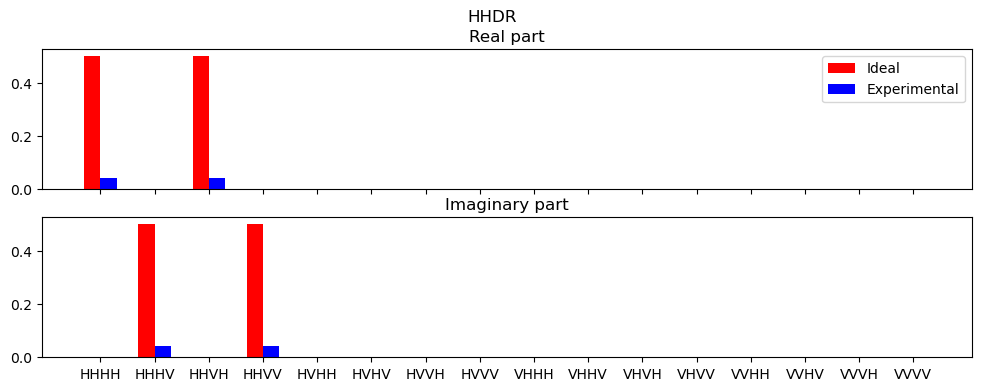

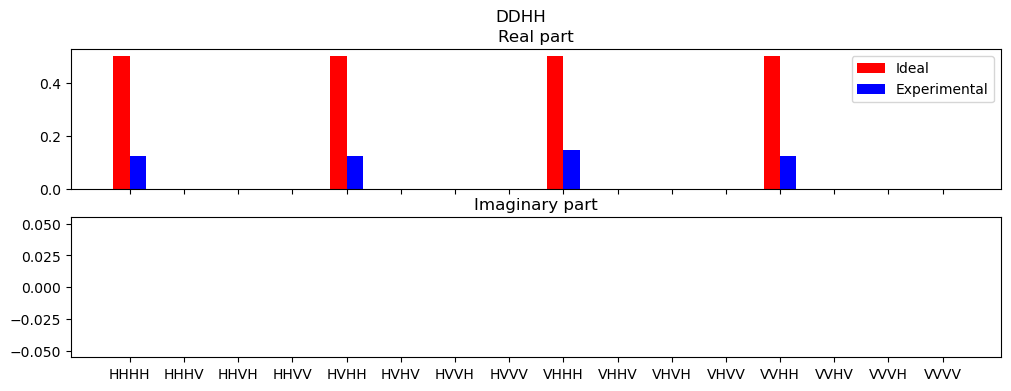

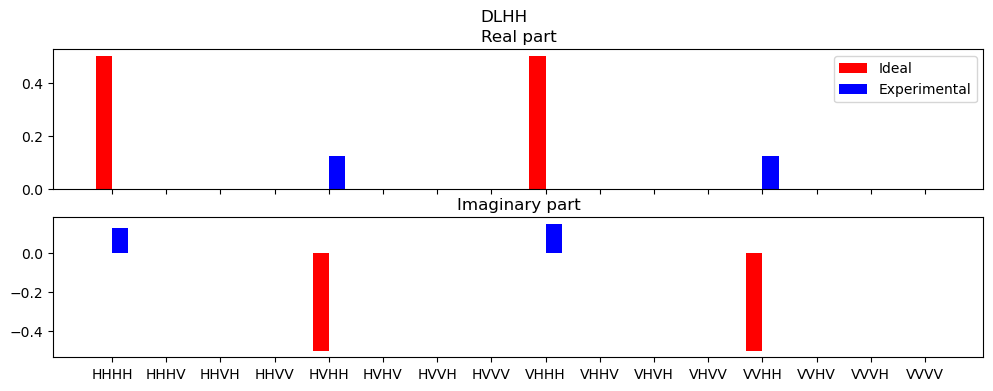

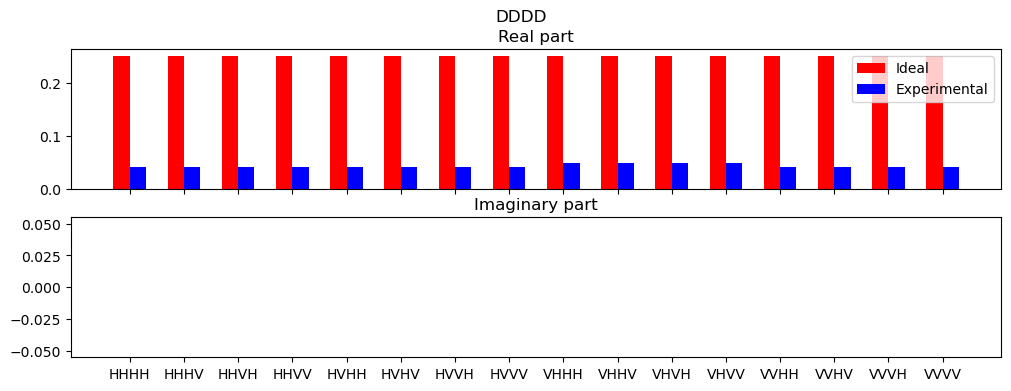

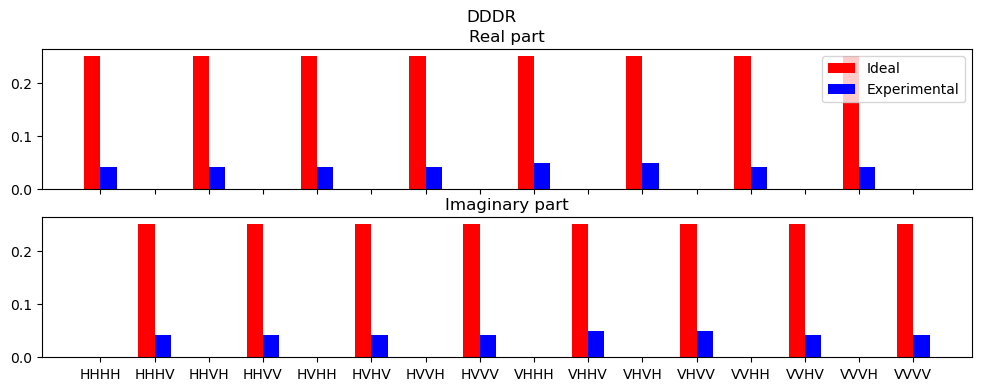

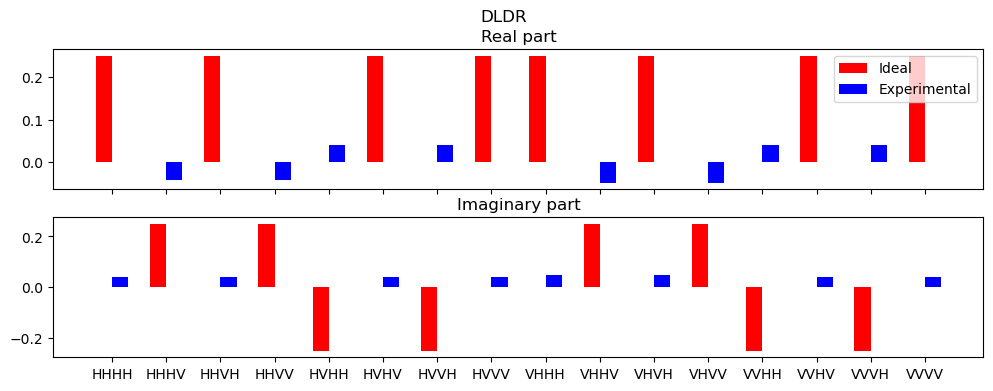

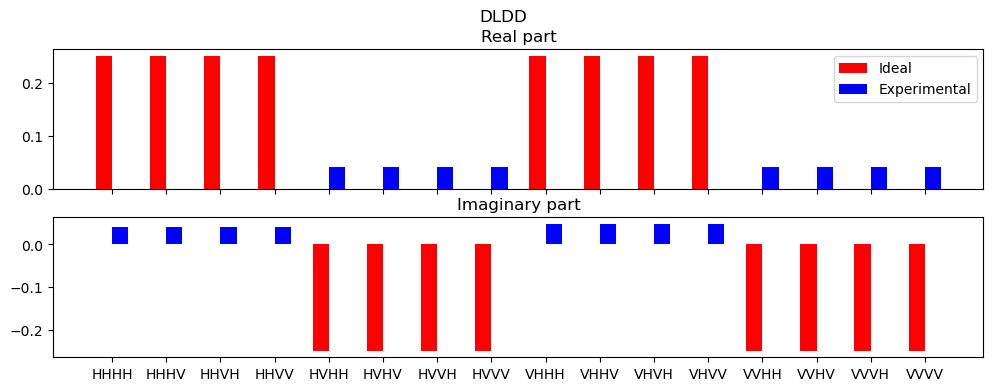

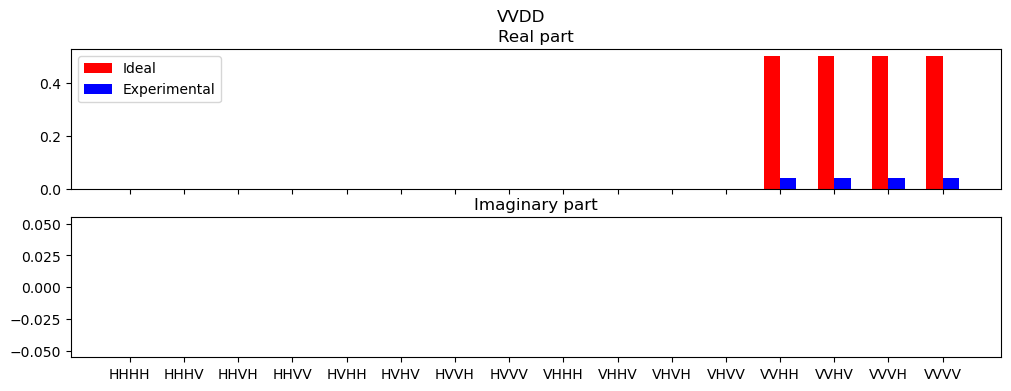

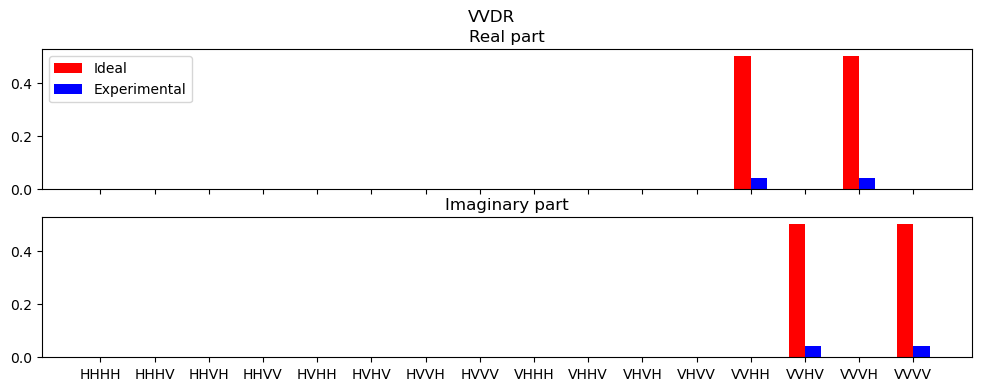

In [111]:
# 1.42732558 1.20348837 1.2005814  1.         file: 6Dic /Pin-3dBm_Phase0.0_300s_F2_1pLong


#Proj_dict[offd_projs[0]]['vect']
diag_name=np.array(['HHHH','HHHV','HHVH','HHVV','HVHH','HVHV','HVVH','HVVV','VHHH','VHHV','VHVH','VHVV','VVHH','VVHV','VVVH','VVVV'])
all_proj_name=np.append(diag_name,proj_name)
NbProj=len(all_proj_name)
base = np.zeros([NbProj,N], dtype=np.complex128)
Proj = np.zeros([NbProj,N], dtype=np.complex128)
Proj_exp = np.zeros([NbProj,N], dtype=np.complex128)
Coinc_exp = np.zeros([NbProj])

## from calibration
# C_arr = Css, Csl, Cls, Cll
C_arr=np.sqrt(np.array([0.97252747, 1.36813187, 0.96703297, 1.        ]))
# C_arr=np.sqrt(np.array([1, 1, 1,  1]))
Loss_s = np.sqrt(10**(-9/10)) #from Franson (after) to detectors
Loss_i = np.sqrt(10**(-9/10)) #from Franson (after) to detectors
# J_arr = J-1 s, J0 s, J+1 s, J-1 i, J0 i, J+1 i
J_arr_s=np.sqrt( np.array([0.33,0.33,0.33]) ) * Loss_s
J_arr_i=np.sqrt( np.array([0.33,0.33,0.33]) ) * Loss_i




for i in range(N):
    ## DIAG, is measured with thelong arm of the MZI close, 
    # so no norm is needed. The phi-mod are also off (@output)

    Coinc_exp[i]=diag_coinc_arr[i] #/np.sum(diag_coinc_arr)
    base[i,:]=prj.extended_projector_from_string(diag_name[i])
    Proj[i,:]=prj.extended_projector_from_string(diag_name[i])
    # print(diag_name[i])

    ## FB, for the diagonal, the modulator @ output are OFF, both idler and signal
    J0=1.0
    J1=0.0
    J_1=0.0

    ## TB for the daigonal, the long-arm of the franson is blocked! ONLY SHORT
    Css=C_arr[0]
    Csl=0
    Cls=0
    Cll=0

    ## for each projector, define the matrix Wexp with the correct parameters
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,0,0)
    # print(W_tb_si)
    W_fb_si=W_fb_si_func(J_1,J0*Loss_s,J1,0.0, J_1,J0*Loss_i,J1,0.0)
    # print(W_fb_si)
    Wexp=np.kron(W_tb_si,W_fb_si)
    # proj_2=np.outer(Proj[i,:],Proj[i,:])
    # W=np.matmul(Wexp.conj().T,proj_2)
    Wexp_2=Wexp.conj().T
    Proj_exp[i,:]=np.matmul(Wexp_2,base[i,:])
    print('Ideal proj diag: ', Proj[i,:])
    print('Exp proj daig: ', Proj_exp[i,:])

    ## plot projector (diag)
    fig, ax= plt.subplots(figsize=(12, 2), ncols=1, nrows=1)
    X=np.linspace(1,N,N)
    width=0.3
    ax.set_title(diag_name[i])
    ax.bar(X-width/2,np.real(Proj[i,:]), label='Ideal', color='red', width=width)
    ax.bar(X+width/2,np.real(Proj_exp[i,:]), label='Experimental', color='blue', width=width)
    ax.set_xticks(X,diag_name)
    ax.legend()
   
print('Coinc diag: ', Coinc_exp)

for p in range(len(proj_name)):
    Css=C_arr[0]
    Csl=C_arr[1]
    Cls=C_arr[2]
    Cll=C_arr[3]

    if type_TB[p]==' ss':
        string_TB='HH'
    if type_TB[p]==' sl':
        string_TB='HV'
    if type_TB[p]==' ls':
        string_TB='VH'
    if type_TB[p]==' ll':
        string_TB='VV'

    if type_FB[p]==' 00':
        string_FB='HH'
    if type_FB[p]=='01':
        string_FB='HV'
    if type_FB[p]==' 10':
        string_FB='VS'
    if type_FB[p]==' 11':
        string_FB='VV'
    
    if proj_name[p][2:4]=='DD' or proj_name[p][2:4]=='DR' or proj_name[p][2:4]=='RD' or proj_name[p][2:4]=='RR' or proj_name[p][2:4]=='LD' or proj_name[p][2:4]=='DL':
        # print('superposition :', proj_name[p][2:4])
        W_fb_si=W_fb_si_func(J_arr_s[0],J_arr_s[1],J_arr_s[2],settings_FB[0,p],J_arr_i[0],J_arr_i[1],J_arr_i[2],settings_FB[1,p])
        print(J_arr_s[0],J_arr_s[1],J_arr_s[2],settings_FB[0,p],J_arr_i[0],J_arr_i[1],J_arr_i[2],settings_FB[1,p])
        # print(W_fb_si)
        string_FB='HH'
    else:
        # print('not superposition :', proj_name[p][2:4])
        J0=1.0
        J1=0.0
        J_1=0.0
        W_fb_si=W_fb_si_func(J_1,J0*Loss_s,J1,settings_FB[0,p],J_1,J0*Loss_i,J1,settings_FB[1,p])

    
    if type_TB[p]==' 2l2l':
        print('2l2l case')
        string_TB='VV' 
        Css=C_arr[3]
        Csl=0
        Cls=0
        Cll=0 
        ## misuro i timestamp nello slot temporale '2l2l'
        ## i due fotoni hanno effettivamente fatto il long, ma è solo per comodità sperimentale
        ## 2 fotoni late fanno il long é equivalente a 2 fotoni late che arrivano nel time slot ll quando il braccio long é bloccato!
        ## la possibilità 2l2l non é presa in considerazione dalla matrice 4x4, ci vorrebbe la 6x6
        ## quindi
        # MISURA : 2 fotoni late che passano dal long
        # ANALISI : 2 fotoni late ('VV') passano dallo short col long bloccato, ma ci vogliono le perdite reali!


    pr=p+N
    base[pr,:]=prj.extended_projector_from_string(string_TB+string_FB)
    print('Base: ', string_TB+string_FB)
    # print(base[pr,:])
    ## for each projector, define the matrix Wexp with the correct parameters
    print('Proj: ', proj_name[p])

    # if settings_TB[3,p]==-1.0:
    #     settings_TB[3,p]=0.0

    
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0.0,0.0,settings_TB[2,p],settings_TB[3,p])
    # print((Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p]))
    # print(W_tb_si)
    
    Wexp=np.kron(W_tb_si,W_fb_si)
    # print(Wexp)
    ######

    Proj[pr,:]=prj.extended_projector_from_string(proj_name[p])
    Wexp_2=Wexp.conj().T

    print('Ideal proj: ', Proj[pr,:])
    Coinc_exp[pr]=coinc_arr[p] #/np.sum(coinc_arr)
    Proj_exp[pr,:]=np.dot(Wexp_2,base[pr,:])
    print('Exp proj: ', Proj_exp[pr,:])

    ##plot projectors
    fig, (axr,axi)= plt.subplots(figsize=(12, 4), ncols=1, nrows=2, sharex=True)

    X=np.linspace(1,N,N)
    width=0.3
    axr.bar(X-width/2,np.real(Proj[pr,:]), label='Ideal', color='red', width=width)
    axr.bar(X+width/2,np.real(Proj_exp[pr,:]), label='Experimental', color='blue', width=width)
    axr.set_title('Real part')
    axi.bar(X-width/2,np.imag(Proj[pr,:]), label='Ideal', color='red', width=width)
    axi.bar(X+width/2,np.imag(Proj_exp[pr,:]), label='Experimental', color='blue', width=width)
    axi.set_title('Imaginary part')
    fig.suptitle(proj_name[p])
    axi.set_xticks(X,diag_name)
    axr.legend()

# print(proj_name)
# print(Proj_exp)
print(Proj_exp.shape)

In [114]:
J_arr_s

array([0.20382477, 0.20382477, 0.20382477])

In [107]:
proj_name[p][2:4]

'DR'

## Density matrix (final)

The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


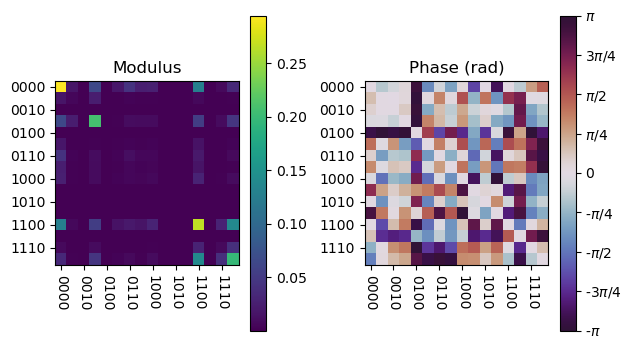

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


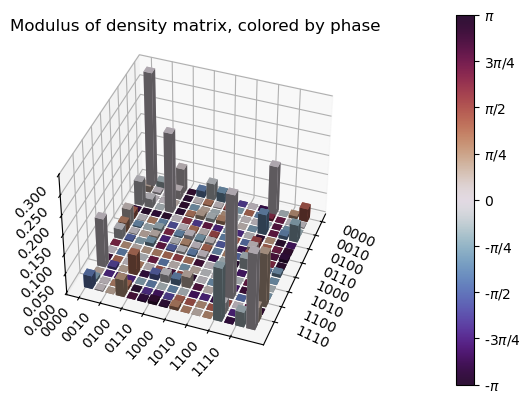

Fidelity:  0.6497215462911259
Purity:  0.3488301747870442


In [96]:
tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp)
# rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp/np.sum(diag_coinc_arr))

dmt.plot_density_matrix_2D(rho_rec)
dmt.plot_density_matrix_3D(rho_rec)




f=dmt.fidelity(rho_rec,rho_true)
print('Fidelity: ', f)
pur=dmt.purity(rho_rec)
print('Purity: ', pur)

(26,)


c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


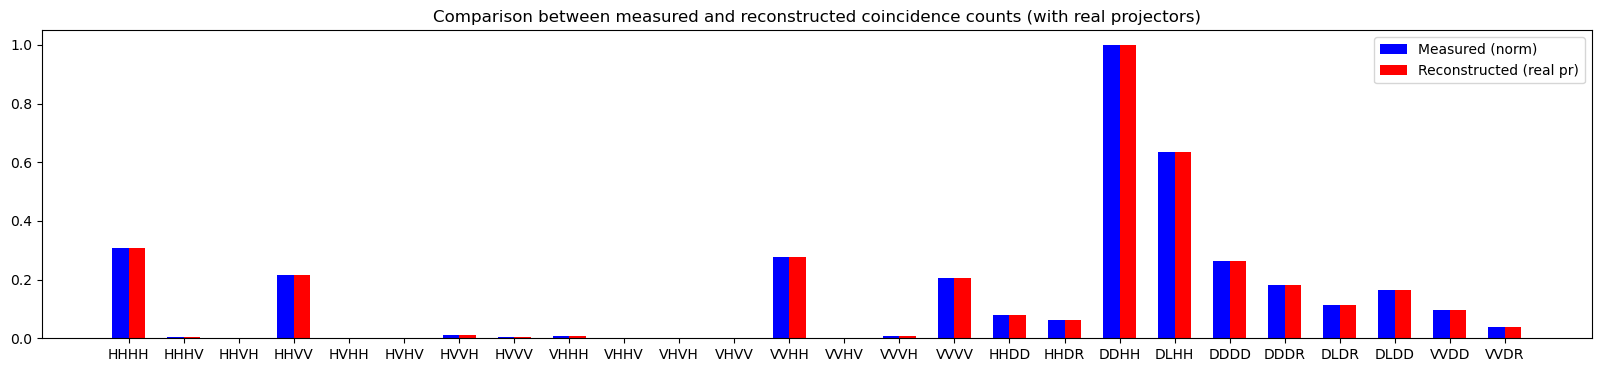

In [ ]:
counts_rec=np.zeros(N+len(proj_name), dtype=complex)
counts_rec1=np.zeros([1,N+len(proj_name)], dtype=complex)
a=np.zeros([1,N], dtype=complex)
print(np.shape(counts_rec))

## Proj_exp, Coinc_exp

fig, ax= plt.subplots(figsize=(20, 4), ncols=1, nrows=1)
for d in range(len(Proj_exp)):
    # print(diag_name[d])
    a=Proj_exp[d].reshape(N,1)
    # print(np.shape(a))

    counts_rec1=np.dot(rho_rec,a)
    # print(counts_ideal1)
    counts_rec[d]=np.dot(a.conj().T[0,:],counts_rec1[:,0])
    # print(counts_rec[d], Coinc_exp[d])

X=np.linspace(1,NbProj,NbProj)
width=0.3
ax.bar(X-width/2,Coinc_exp/np.max(Coinc_exp), label='Measured (norm)', color='blue', width=width)
ax.bar(X+width/2,counts_rec/np.max(counts_rec), label='Reconstructed (real pr)', color='red', width=width)
ax.set_xticks(X,np.append(diag_name,proj_name))
ax.set_title("Comparison between measured and reconstructed coincidence counts (with real projectors)")
ax.legend(loc='best')

(26,)


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


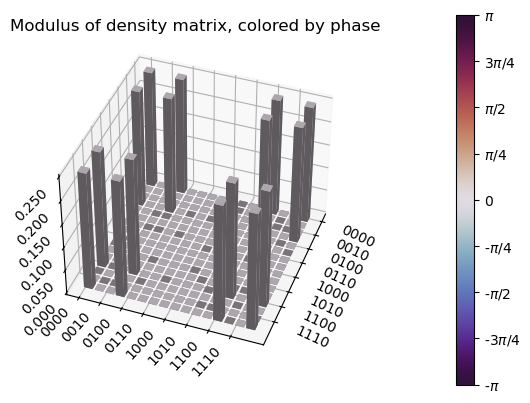

c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


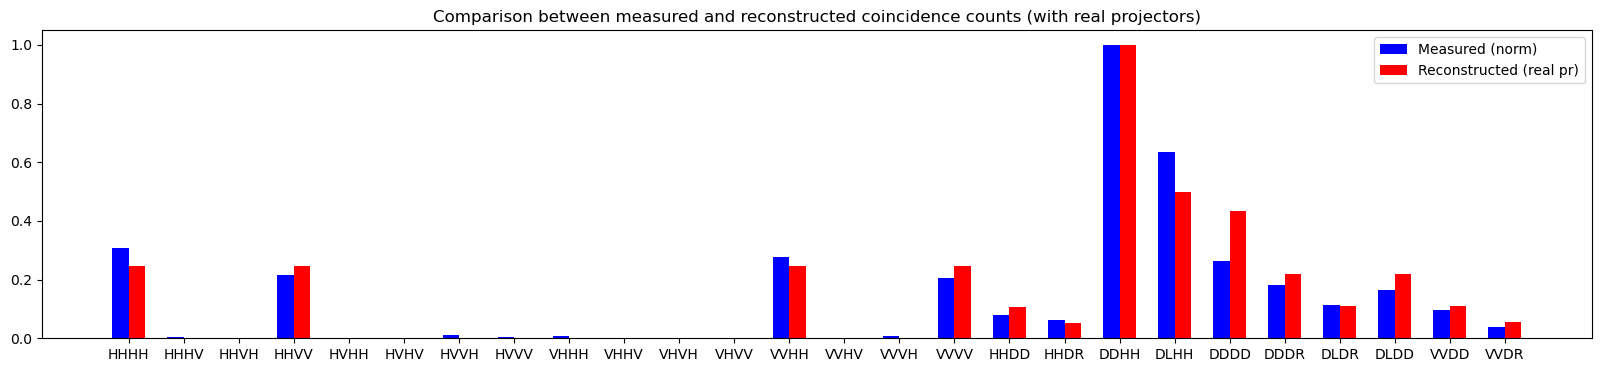

In [ ]:
counts_rec=np.zeros(N+len(proj_name), dtype=complex)
counts_rec1=np.zeros([1,N+len(proj_name)], dtype=complex)
a=np.zeros([1,N], dtype=complex)
print(np.shape(counts_rec))

## Proj_exp, Coinc_exp

dmt.plot_density_matrix_3D(rho_true)
fig, ax= plt.subplots(figsize=(20, 4), ncols=1, nrows=1)
for d in range(len(Proj_exp)):
    # print(diag_name[d])
    a=Proj_exp[d].reshape(N,1)
    # print(np.shape(a))

    counts_rec1=np.dot(rho_true,a)
    # print(counts_ideal1)
    counts_rec[d]=np.dot(a.conj().T[0,:],counts_rec1[:,0])
    # print(counts_rec[d], Coinc_exp[d])

X=np.linspace(1,NbProj,NbProj)
width=0.3
ax.bar(X-width/2,Coinc_exp/np.max(Coinc_exp), label='Measured (norm)', color='blue', width=width)
ax.bar(X+width/2,counts_rec/np.max(counts_rec), label='Reconstructed (real pr)', color='red', width=width)
ax.set_xticks(X,np.append(diag_name,proj_name))
ax.set_title("Comparison between measured and reconstructed coincidence counts (with real projectors)")
ax.legend(loc='best')

    

In [116]:
counts_rec/np.max(counts_rec)

array([0.24653006+0.00000000e+00j, 0.        +0.00000000e+00j,
       0.        +0.00000000e+00j, 0.24653006+0.00000000e+00j,
       0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
       0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
       0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
       0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
       0.24653006+0.00000000e+00j, 0.        +0.00000000e+00j,
       0.        +0.00000000e+00j, 0.24653006+0.00000000e+00j,
       0.10738849+0.00000000e+00j, 0.05369405+3.46823307e-18j,
       1.        +0.00000000e+00j, 0.50002241+0.00000000e+00j,
       0.4356    +0.00000000e+00j, 0.2177992 +0.00000000e+00j,
       0.10890448-1.51735197e-18j, 0.21780976-1.38729323e-17j,
       0.11042207+0.00000000e+00j, 0.05521083+0.00000000e+00j])

In [115]:
4/9

0.4444444444444444

### Density matrix with ideal projectors

The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


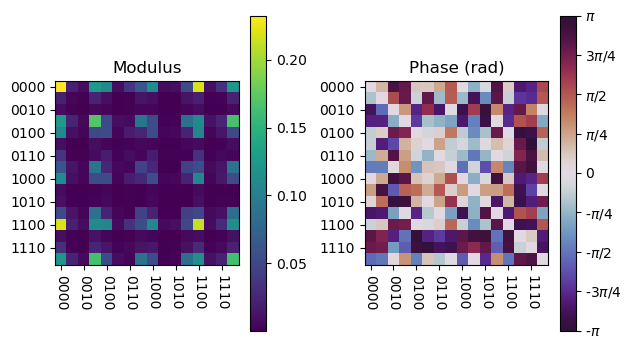

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


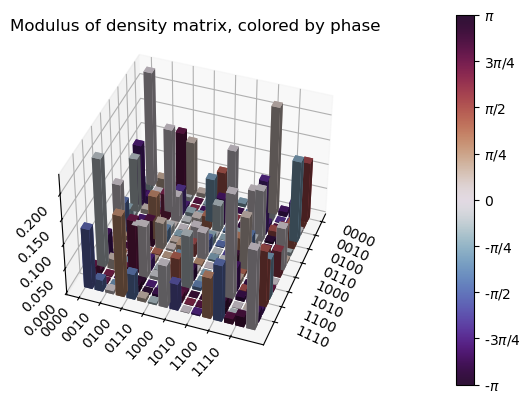

Fidelity:  0.49891845803676127
Purity:  0.6687390514492315


In [87]:
tomo.set_density_matrix_model(model_triangular)

rho_rec_ideal = tomo.get_density_matrix(Proj, Coinc_exp)

dmt.plot_density_matrix_2D(rho_rec_ideal)
dmt.plot_density_matrix_3D(rho_rec_ideal)

f=dmt.fidelity(rho_rec_ideal,rho_true)
print('Fidelity: ', f)
pur=dmt.purity(rho_rec_ideal)
print('Purity: ', pur)


### 

# fig, ax= plt.subplots(figsize=(20, 4), ncols=1, nrows=1)
# for d in range(NbProj):
#     # print(diag_name[d])
#     a=Proj[d].reshape(NbProj,1)
#     # print(np.shape(a))

#     counts_rec1=np.matmul(rho_rec_ideal,a)
#     # print(counts_ideal1)
#     counts_rec[d]=np.matmul(a.conj().T,counts_rec1)
#     # print(counts_rec[d], Coinc_exp[d])

# X=np.linspace(1,len(np.append(diag_name,proj_name)),len(np.append(diag_name,proj_name)))
# width=0.3
# ax.bar(X-width/2,Coinc_exp/np.max(Coinc_exp), label='Measured (norm)', color='blue', width=width)
# ax.bar(X+width/2,counts_rec/np.max(counts_rec), label='Reconstructed (real pr)', color='red', width=width)
# ax.set_xticks(X,np.append(diag_name,proj_name))
# ax.set_title("Comparison between measured and reconstructed coincidence counts (with ideal projectors)")
# ax.legend(loc='best')
    